In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [214]:
# Load the dataset
df = pd.read_csv("Dataset .csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [216]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


### Level 1 - Task1: Top Cuisines

In [217]:
# here we are converting the Cuisines column to string type to avoid issues with Nan Values.
df["Cuisines"] = df["Cuisines"].astype(str)
# Count the top 3 cuisines
top_cuisines = df["Cuisines"].value_counts().head(3)
(top_cuisines)

Cuisines
North Indian             936
North Indian, Chinese    511
Chinese                  354
Name: count, dtype: int64

In [218]:
# Calculate percentage of all resturants that serves these top cuisines
top_percent = (top_cuisines / df.shape[0]) * 100
(top_percent)

Cuisines
North Indian             9.800021
North Indian, Chinese    5.350225
Chinese                  3.706418
Name: count, dtype: float64

### Level 1 - Task 2 : City Analysis

In [219]:
# here we are trying to find the city with the most number of restaurants
city_counts = df["City"].value_counts() # count the number of restaurant in each city
top_city = city_counts.idxmax() # idxmax() with the help of this we find the city with the maximum number of restaurants

# here we group the data by city and calculate the average rating for each city
city_avg_rating = df.groupby('City')['Aggregate rating'].mean()

# here we find the city with the highest average rating
highest_avg_rating_city = city_avg_rating.idxmax()

print(top_city, city_avg_rating[highest_avg_rating_city])


New Delhi 4.9


### Level 1 : Task 3 : Price Range Distribution

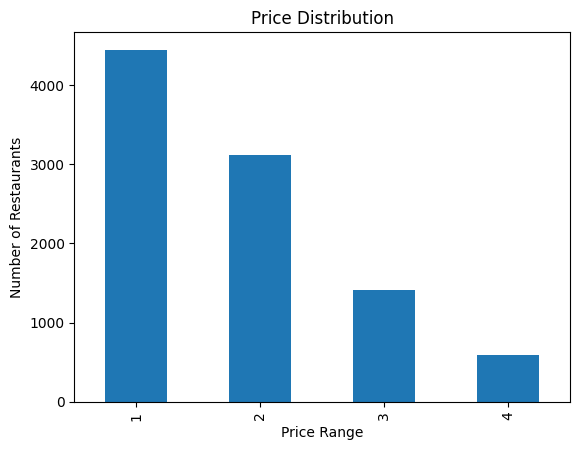

Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: count, dtype: float64

In [220]:
# here we create a bar plot
df['Price range'].value_counts().plot(kind = 'bar', title = "Price Distribution")
plt.xlabel("Price Range")
plt.ylabel("Number of Restaurants")
plt.show()

# calculate the percentage of restaurants in each price range
price_percent = (df["Price range"].value_counts()/ df.shape[0]) * 100
price_percent

### Level 1 Task 4 : Online Delivery

In [221]:
# It calculates the percentage of restaurants that offer or do not offer online delivery, based on the "Has Online delivery" column in your dataset.
delivery_pct = (df["Has Online delivery"].value_counts() / df.shape[0]) * 100
print(delivery_pct)
# Here we calculates the average rating of restaurants that offer online delivery.
avg_with_delivery = df[df["Has Online delivery"] == "Yes"]["Aggregate rating"].mean()
# Here we calculates the average rating of restaurants that do NOT offer online delivery.
avg_without_delivery = df[df["Has Online delivery"] == "No"]["Aggregate rating"].mean()
print(f"With Delivery: {avg_with_delivery}, Without Delivery: {avg_without_delivery}")

Has Online delivery
No     74.337766
Yes    25.662234
Name: count, dtype: float64
With Delivery: 3.2488372093023257, Without Delivery: 2.465295774647887


### Level 2 Task 1 : Restaurant Ratings

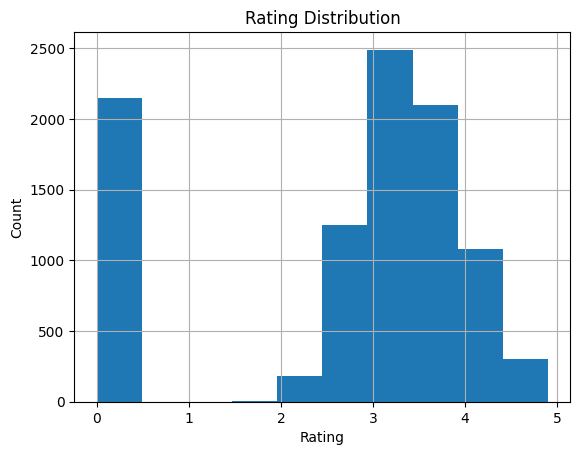

Aggregate rating
0.0    2148
3.2     522
3.1     519
Name: count, dtype: int64
156.909747670401


In [222]:
# Plot histogram of ratings to see distribution
df['Aggregate rating'].hist(bins=10)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# Show most common rating values
print(df['Aggregate rating'].value_counts().head(3))

# Calculate average number of votes restaurants received
avg_votes = df['Votes'].mean()
print(avg_votes)


###  Level 2 Task 2: Cuisine Combination

In [223]:
# Show top 10 most common cuisine combinations
combo_counts = df["Cuisines"].value_counts().head(10)
print(combo_counts)

# Calculate average rating for each cuisine combo
cuisine_rating = df.groupby("Cuisines")["Aggregate rating"].mean().sort_values(ascending=False).head(10)
print(cuisine_rating)

Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64
Cuisines
Continental, Indian             4.9
BBQ, Breakfast, Southern        4.9
Italian, Deli                   4.9
American, Caribbean, Seafood    4.9
Burger, Bar Food, Steak         4.9
American, Burger, Grill         4.9
Italian, Bakery, Continental    4.9
European, Asian, Indian         4.9
European, Contemporary          4.9
American, Coffee and Tea        4.9
Name: Aggregate rating, dtype: float64


### Level 2 Task 3: Geographic Analysis

In [ ]:
# folium is a Python library used to create interactive Leaflet maps directly from Python.
import folium
# Create a map centered around the average location of all restaurants
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
restaurant_map = folium.Map(location=map_center, zoom_start=11)

# Plot each restaurant on the map
for _, row in df.iterrows():
    folium.CircleMarker([row['Latitude'], row['Longitude']],
                        radius=1,
                        color='blue').add_to(restaurant_map)
# Save the map as an HTML file
restaurant_map.save("restaurant_map.html")

### Level 2 Task 4: Restaurant Chains

In [233]:
# Count how many times each restaurant name appears
chains = df["Restaurant Name"].value_counts()
chains = chains[chains > 1] ## Filter only names appearing more than once

# Filter dataset to include only chain restaurants
chain_data = df[df['Restaurant Name'].isin(chains.index)]

# Group by name and calculate average rating
chain_ratings = chain_data.groupby('Restaurant Name')['Aggregate rating'].mean()
print(chain_ratings.head())


Restaurant Name
10 Downing Street       4.000000
221 B Baker Street      3.366667
34 Parkstreet Lane      3.050000
34, Chowringhee Lane    2.791667
4700BC Popcorn          3.500000
Name: Aggregate rating, dtype: float64


###  Level 3 – Task 1: Restaurant Reviews


In [251]:
# Step 1: Clean column name and calculate length of rating phrases
df['Rating Length'] = df['Rating text'].astype(str).apply(lambda x: len(x.split()))
# Step 2: Calculate the average word count in 'Rating text'
print("Average Rating Text Length (in words):", df['Rating Length'].mean())
# Step 3: Correlation between word count in rating text and actual rating
print("Correlation with Aggregate Rating:", df['Rating Length'].corr(df['Aggregate rating']))


Average Rating Text Length (in words): 1.3378703800649148
Correlation with Aggregate Rating: -0.5995731124014941


###  Level 3 Task 2: Votes Analysis

In [252]:
# Restaurants with most votes
top_voted = df.sort_values('Votes', ascending=False).head(5)
print("Top Voted Restaurants:\n", top_voted[['Restaurant Name', 'Votes']])
# Correlation between votes and rating
vote_corr = df['Votes'].corr(df['Aggregate rating'])
print("Votes-Rating Correlation:", vote_corr)


Top Voted Restaurants:
                 Restaurant Name  Votes
728                        Toit  10934
735                    Truffles   9667
3994           Hauz Khas Social   7931
2412                  Peter Cat   7574
739   AB's - Absolute Barbecues   6907
Votes-Rating Correlation: 0.31369058419541146


### Level 3 Task 3: Price vs. Delivery/Booking

In [254]:
# Convert "Yes"/"No" to 1/0
df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})
df['Has Table booking'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})
# Now group and take mean
service_comparison = df.groupby('Price range')[['Has Online delivery', 'Has Table booking']].mean()
print(service_comparison)


             Has Online delivery  Has Table booking
Price range                                        
1                       0.157741           0.000225
2                       0.413106           0.076775
3                       0.291903           0.457386
4                       0.090444           0.467577
